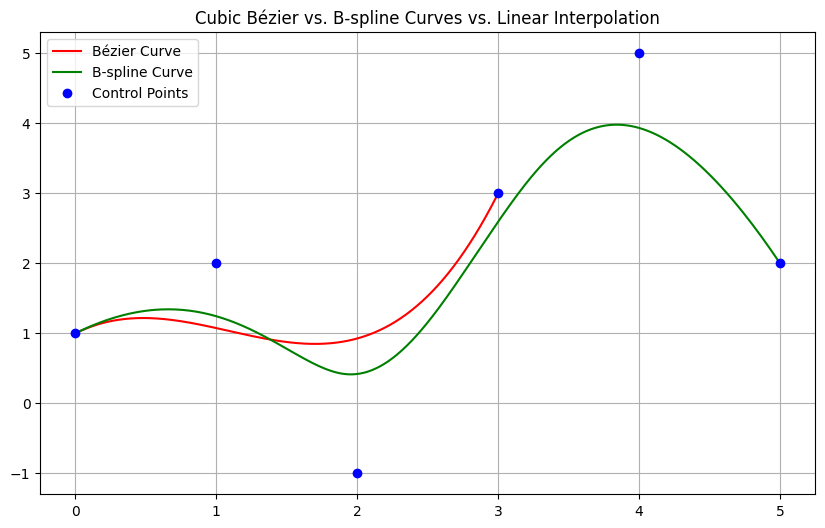

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import math 
def bezier(t, P0, P1, P2, P3):
    """Calculate point on cubic Bézier curve."""
    return (1 - t)**3 * P0 + 3 * (1 - t)**2 * t * P1 + 3 * (1 - t) * t**2 * P2 + t**3 * P3

def bspline_basis(i, k, t, knots):
    """
    Compute the B-spline basis function value using Cox-de Boor's algorithm.

    Parameters:
        i: control point index
        k: spline degree
        t: parameter value
        knots: knot vector

    Returns:
        B-spline basis value.
    """
    if k == 0:
        return 1.0 if knots[i] <= t < knots[i + 1] else 0.0
    else:
        coeff1 = (t - knots[i]) / (knots[i + k] - knots[i]) if (knots[i + k] - knots[i]) != 0 else 0
        coeff2 = (knots[i + k + 1] - t) / (knots[i + k + 1] - knots[i + 1]) if (knots[i + k + 1] - knots[i + 1]) != 0 else 0

        return coeff1 * bspline_basis(i, k - 1, t, knots) + coeff2 * bspline_basis(i + 1, k - 1, t, knots)

def generate_knot_vector(n, degree):
    """Generate a clamped knot vector for B-splines."""
    knots = np.concatenate(([0]*degree, np.arange(n-degree+1), [n-degree]*degree))
    #[0, 0, 0, 0, 1, 2, 3, 3, 3, 3]
    return knots


def bspline(t, control_points, degree=3):
    """
    Evaluate a B-spline at a parameter t.

    Parameters:
        t: parameter value
        control_points: list of control points
        degree: spline degree

    Returns:
        Point on the B-spline curve.
    """
    n = len(control_points)
    if t == 1:
        return control_points[-1]
    t = t * (n - degree )
    t = min(max(t, 0), n - degree)  # Clamp t
    k = degree
    knots = generate_knot_vector(n, degree)
    point = np.zeros(2)
    for i in range(n):
        point += np.array(control_points[i]) * bspline_basis(i, k, t, knots)
    return point

def linear_interpolation(t, P0, P1):
    """Calculate point using linear interpolation."""
    return (1 - t) * P0 + t * P1

# Define control points
P = [np.array([0, 1]), np.array([1, 2]), np.array([2, -1]), np.array([3, 3]), np.array([4, 5]), np.array([5, 2])]

# Generate curve points
t_values = np.linspace(0, 1, 400)
bezier_points = np.array([bezier(t, *P[:4]) for t in t_values])
bspline_points = np.array([bspline(t, P) for t in t_values])
linear_points = np.array([linear_interpolation(t, P[0], P[-1]) for t in t_values])

# Plot curves and control points
plt.figure(figsize=(10, 6))
plt.plot(bezier_points[:, 0], bezier_points[:, 1], 'r-', label='Bézier Curve')
plt.plot(bspline_points[:, 0], bspline_points[:, 1], 'g-', label='B-spline Curve')
# plt.plot(linear_points[:, 0], linear_points[:, 1], 'b', label='Linear Interpolation')
plt.plot([p[0] for p in P], [p[1] for p in P], 'bo', label='Control Points')
plt.legend()
plt.grid()
plt.title('Cubic Bézier vs. B-spline Curves vs. Linear Interpolation')
plt.show()